In [31]:
##Data exploration
#Importing table and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Reading .csv file for complete, cleaned dataset
df_path='TA_sementara.csv'
df_raw=pd.read_csv(df_path)
df = df_raw[0:150]
df.head(150)

,Li_sto,Ni_sto,Co_sto,Mn_sto,sint_temp,sint_time,dop_ionrad,dop_sto,xrd_a,xrd_c,Rca,%_catmix,init_cap,%_cr
0,1.0,0.800,0.100,0.100,750,15.0,0.000,0.000,2.8710,14.2087,4.949000,1.580,185,74.000000
1,1.0,0.790,0.100,0.100,750,15.0,1.170,0.010,2.8709,14.2005,4.946400,1.970,190,90.000000
2,1.0,0.770,0.100,0.100,750,15.0,1.170,0.030,2.8712,14.2013,4.946100,1.640,175,95.000000
3,1.0,0.800,0.100,0.100,850,20.0,0.000,0.000,2.8727,14.2012,4.943500,3.230,188,82.000000
4,1.0,0.792,0.099,0.099,850,20.0,0.605,0.010,2.8729,14.2112,4.946600,3.200,187,89.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,1.0,0.800,0.100,0.100,800,12.0,0.000,0.000,2.8630,14.2300,4.970311,1.357,137,75.000000
145,1.0,0.800,0.100,0.099,800,12.0,0.720,0.010,2.8660,14.2680,4.978367,1.511,171,92.000000
146,1.0,0.850,0.100,0.050,760,6.0,0.000,0.000,2.8700,14.1880,4.943554,1.600,182,83.333333
147,1.0,0.850,0.100,0.050,760,6.0,0.535,0.003,2.8720,14.1840,4.938719,1.560,189,93.333333


In [42]:
#Dropping unnecessary columns for prediction
#df = df.drop(['conductivity','good_cond','li_dopant','la_dopant','zr_dopant','source'], axis=1)
#df.head()

#Describing the dataset
df.describe()

,Li_sto,Ni_sto,Co_sto,Mn_sto,sint_temp,sint_time,dop_ionrad,dop_sto,xrd_a,xrd_c,Rca,%_catmix,init_cap,%_cr
count,149.000000,149.000000,149.000000,149.000000,149.000000,145.000000,147.000000,146.000000,140.000000,140.000000,140.000000,94.000000,149.000000,149.000000
mean,0.999038,0.754174,0.122426,0.116044,806.442953,13.572414,0.487177,0.013748,2.870814,14.207275,4.948856,10.270814,172.973154,85.984340
std,0.004159,0.089740,0.039916,0.052123,37.309404,3.388594,0.376087,0.015494,0.004618,0.022632,0.008051,57.058248,18.712601,9.393015
min,0.970000,0.588000,0.050000,0.025000,750.000000,6.000000,0.000000,0.000000,2.855600,14.145000,4.931100,1.160000,121.000000,42.000000
25%,1.000000,0.700000,0.100000,0.098000,800.000000,12.000000,0.000000,0.000000,2.868950,14.194675,4.943589,2.255000,163.000000,80.000000
50%,1.000000,0.800000,0.100000,0.100000,800.000000,14.000000,0.605000,0.010000,2.870870,14.203300,4.947150,3.555000,177.000000,89.000000
75%,1.000000,0.800000,0.120000,0.150000,830.000000,15.000000,0.720000,0.020000,2.873300,14.215600,4.952100,6.737500,186.000000,93.000000
max,1.000000,0.900000,0.200000,0.200000,900.000000,24.000000,1.520000,0.060000,2.888000,14.278000,4.978367,557.000000,205.000000,98.000000


count    14.000000
mean      0.119066
std       0.308472
min      -0.213339
25%      -0.080968
50%       0.057477
75%       0.162967
max       1.000000
Name: %_cr, dtype: float64

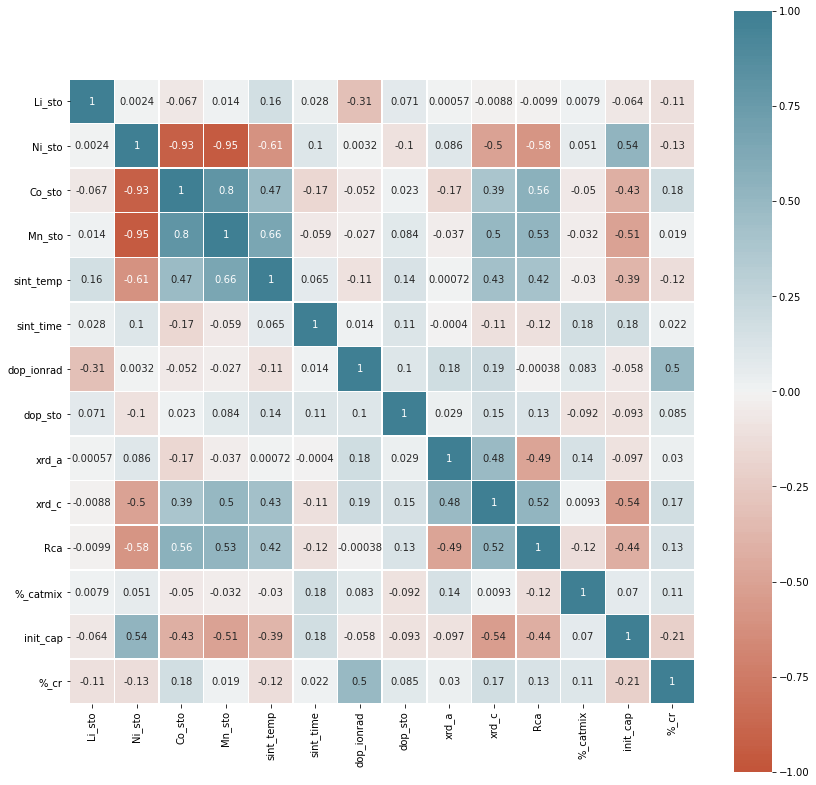

In [43]:
#Finding correlation between features
corr = df.corr()
plt.subplots(figsize=(14,14))
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    linewidths = .5, annot = True,
    cmap = sns.diverging_palette(20, 220, n = 200),
    square = True)
corr

#Heatmap description
corr['%_cr'].describe()

In [30]:
#Finding missing values distribution on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Li_sto      138 non-null    float64
 1   Ni_sto      138 non-null    float64
 2   Co_sto      138 non-null    float64
 3   Mn_sto      138 non-null    float64
 4   sint_temp   138 non-null    int64  
 5   sint_time   134 non-null    float64
 6   dop_ionrad  136 non-null    float64
 7   dop_sto     135 non-null    float64
 8   xrd_a       129 non-null    float64
 9   xrd_c       129 non-null    float64
 10  Rca         129 non-null    float64
 11  %_catmix    83 non-null     float64
 12  init_cap    138 non-null    int64  
 13  %_cr        138 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 15.2 KB


C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


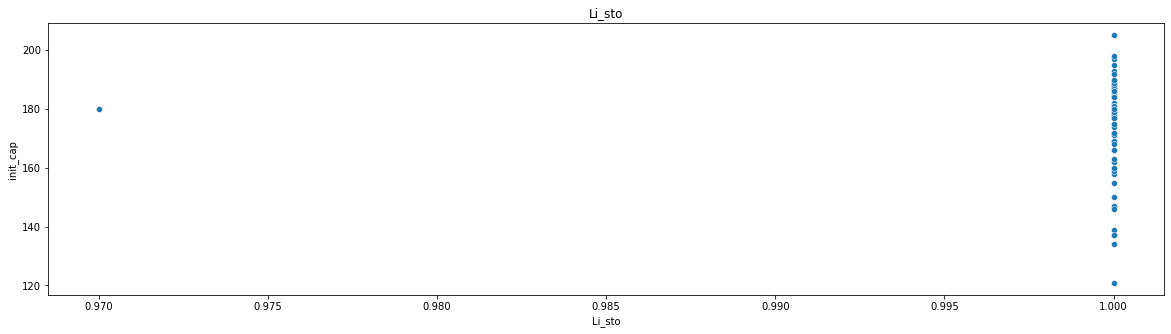

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


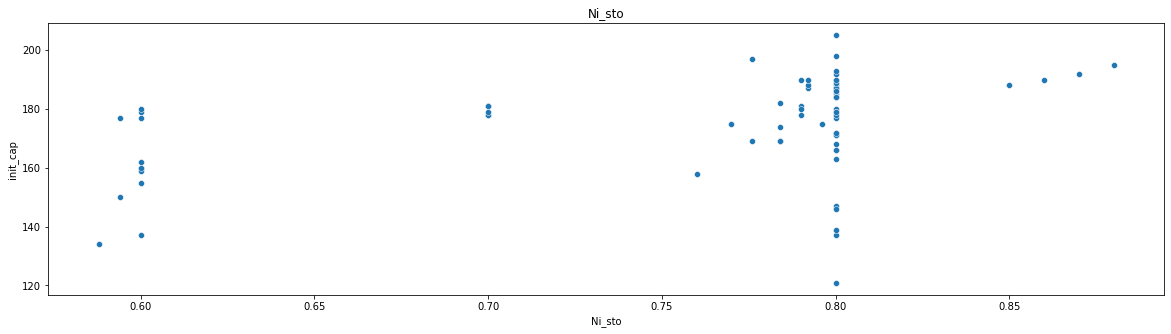

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


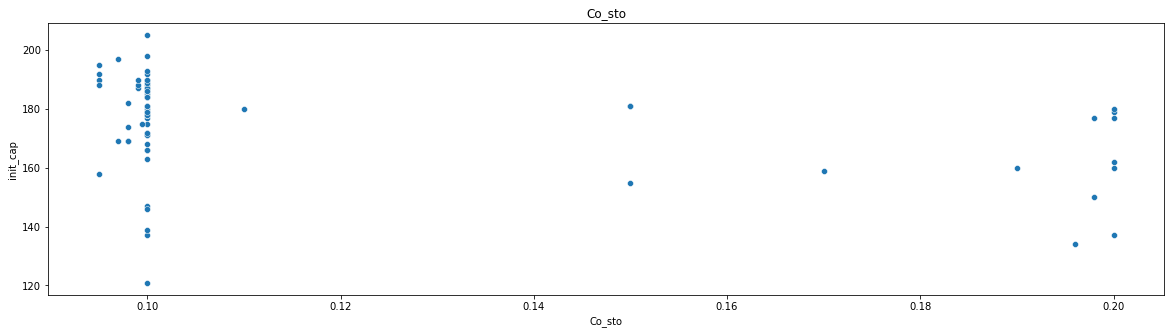

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


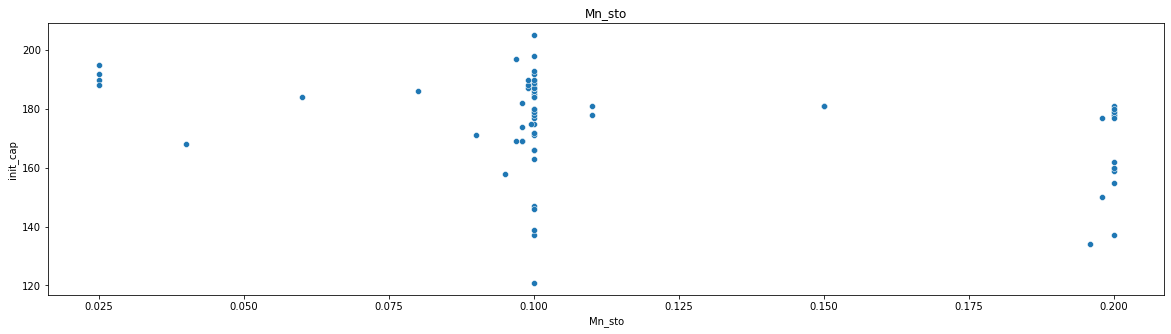

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


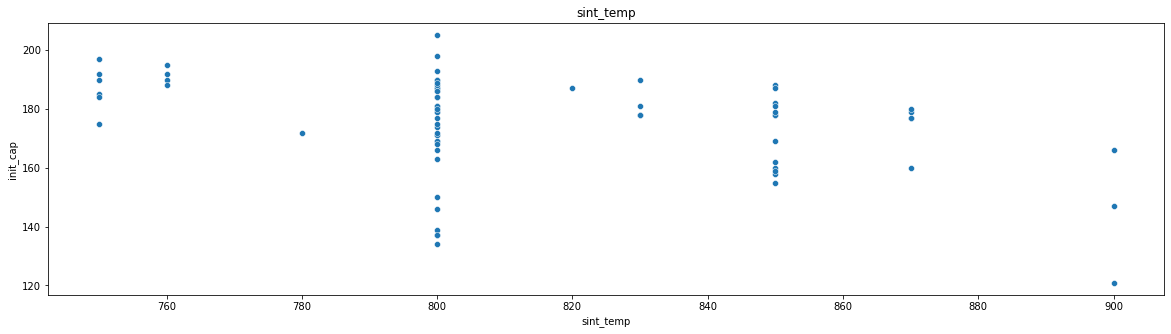

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


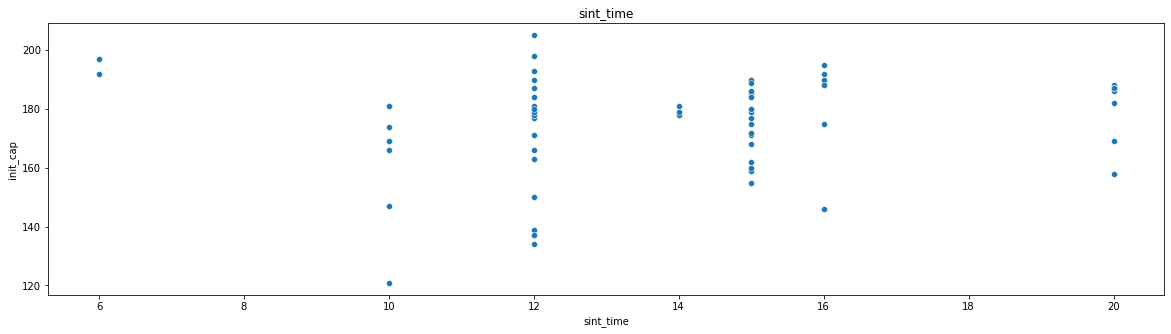

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


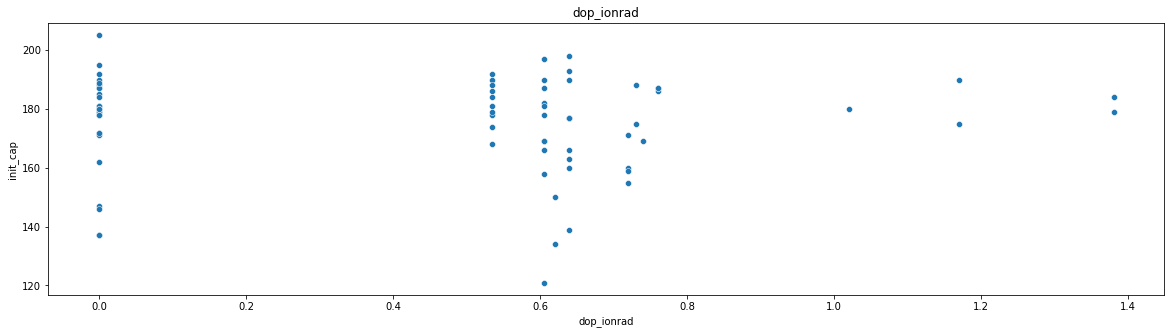

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


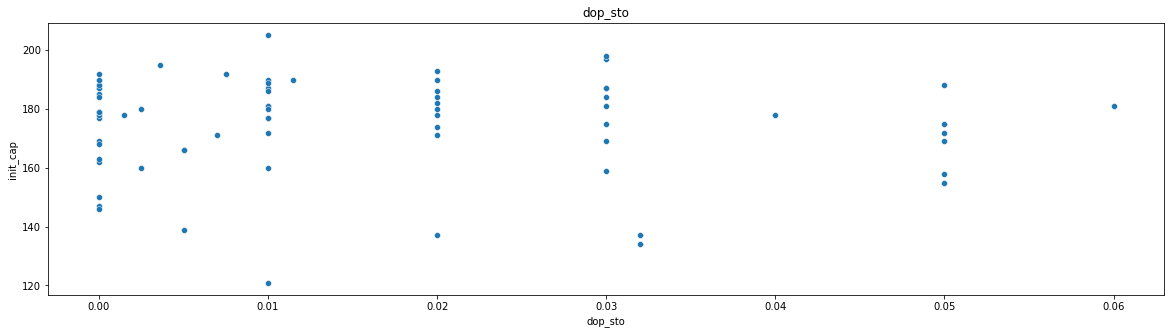

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


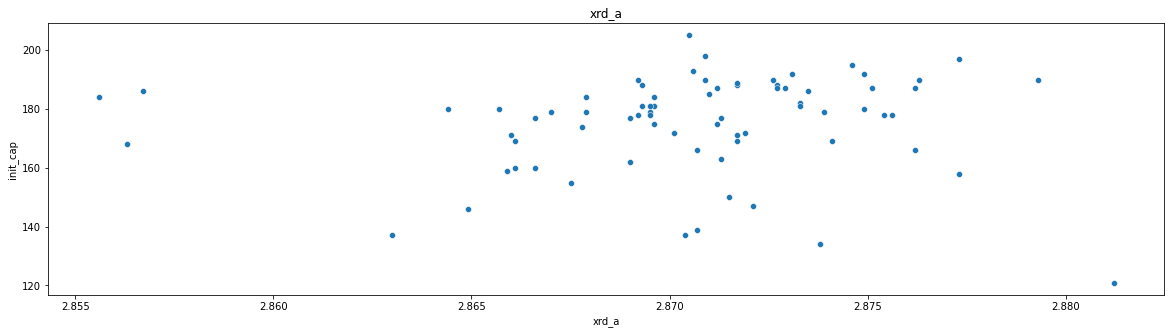

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


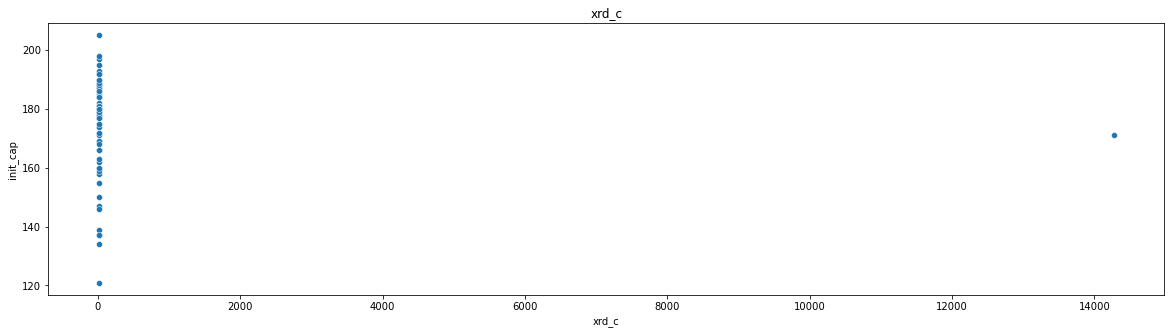

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


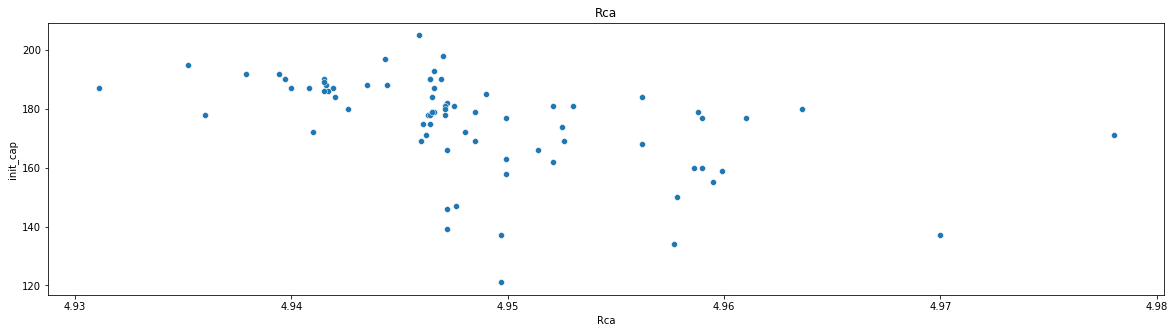

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


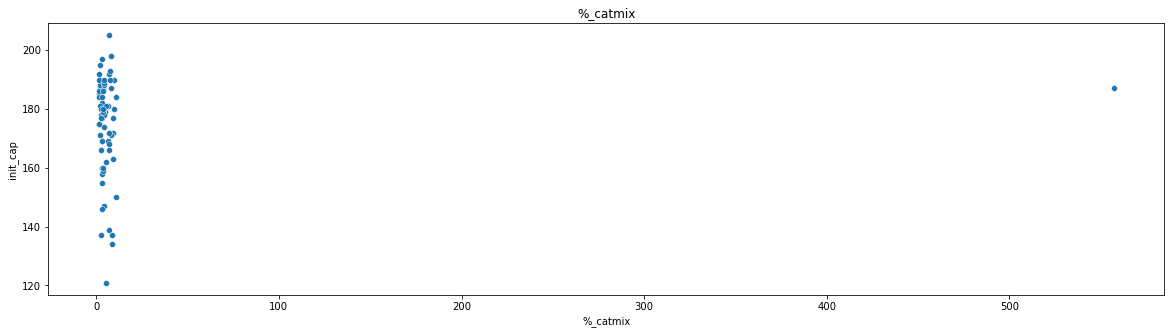

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


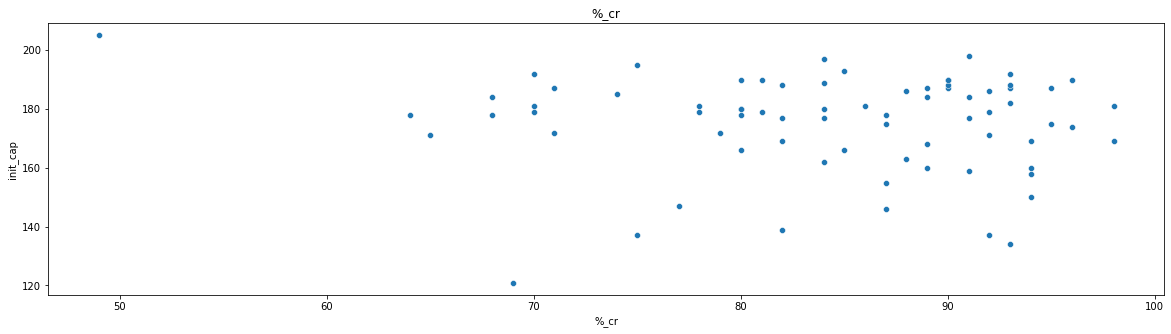

In [17]:
#Making scatter plots to illustrate feature data distribution in respect to log_cond
for col in df.columns.values:
    if col == 'init_cap':
        continue
    plt.figure(figsize=(20,5))
    sns.scatterplot(df.dropna()[col], df.dropna()['init_cap'])
    plt.title(col)
    plt.show()

In [18]:
import lazypredict

#Importing dataset splitting and imputing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

#Defining X (features) and y (target property) for cut dataset
X = df.dropna().drop('log_cond', axis=1)
y = df.dropna()['log_cond']
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Defining X (features) and y (target property) for imputed dataset
X_imp = df.drop('log_cond', axis=1)
y_imp = df.log_cond
#Splitting
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imp, y_imp, test_size=0.25, random_state=42)

#Imputing X_train_imp
my_imputer = SimpleImputer(strategy = 'mean')
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train_imp))
imputed_X_train.columns = X_train_imp.columns
imputed_X_train.index = X_train_imp.index

#Imputing X_test_imp
imputed_X_test = pd.DataFrame(my_imputer.transform(X_test_imp))
imputed_X_test.columns = X_test_imp.columns
imputed_X_test.index = X_test_imp.index


KeyError: "['log_cond'] not found in axis"

In [8]:
#Importing necessary libraries for LazyRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

#Using LazyRegressor for cut dataset
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

C:\Users\Muhammad Labib\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 26%|██▌       | 11/43 [00:02<00:09,  3.55it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 72%|███████▏  | 31/43 [00:07<00:02,  4.14it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 88%|████████▊ | 38/43 [00:09<00:01,  3.12it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:11<00:00,  3.61it/s]

                               R-Squared  RMSE  Time Taken
Model                                                     
RandomForestRegressor               0.52  0.48        1.25
BaggingRegressor                    0.50  0.49        0.17
OrthogonalMatchingPursuit           0.48  0.50        0.05
LassoLarsIC                         0.45  0.51        0.07
BayesianRidge                       0.44  0.52        0.06
SGDRegressor                        0.44  0.52        0.05
KNeighborsRegressor                 0.43  0.52        0.04
RidgeCV                             0.43  0.52        0.10
LassoLarsCV                         0.43  0.52        0.08
LarsCV                              0.43  0.52        0.16
Ridge                               0.43  0.52        0.07
LassoCV                             0.42  0.52        1.00
ElasticNetCV                        0.42  0.52        0.72
SVR                                 0.41  0.53        0.10
TweedieRegressor                    0.40  0.53        0.

In [9]:
#Using LazyRegressor for imputed dataset
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(imputed_X_train, imputed_X_test, y_train_imp, y_test_imp)

print(models)

 26%|██▌       | 11/43 [00:02<00:07,  4.28it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 72%|███████▏  | 31/43 [00:07<00:02,  4.04it/s]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 88%|████████▊ | 38/43 [00:09<00:01,  3.45it/s]

StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████| 43/43 [00:10<00:00,  4.04it/s]

                               R-Squared  RMSE  Time Taken
Model                                                     
GradientBoostingRegressor           0.77  0.40        0.25
RandomForestRegressor               0.61  0.53        1.10
BaggingRegressor                    0.60  0.53        0.14
OrthogonalMatchingPursuitCV         0.58  0.55        0.07
OrthogonalMatchingPursuit           0.58  0.55        0.04
XGBRegressor                        0.57  0.55        0.31
ExtraTreesRegressor                 0.56  0.56        0.51
SGDRegressor                        0.55  0.56        0.09
TransformedTargetRegressor          0.54  0.57        0.33
LinearRegression                    0.54  0.57        0.33
Lars                                0.54  0.57        0.06
RidgeCV                             0.53  0.57        0.05
LassoCV                             0.53  0.57        1.13
ElasticNetCV                        0.53  0.58        1.16
LassoLarsCV                         0.53  0.58        0.